In [1]:
!git clone https://github.com/hdd0510/ObjectDetectionDL.git

Cloning into 'ObjectDetectionDL'...
remote: Enumerating objects: 116, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 116 (delta 58), reused 82 (delta 32), pack-reused 0
Receiving objects: 100% (116/116), 4.77 MiB | 6.21 MiB/s, done.
Resolving deltas: 100% (58/58), done.


In [2]:
!pip install ultralytics
!pip install tidecv
!pip install pycocotools

  Obtaining dependency information for ultralytics from https://files.pythonhosted.org/packages/89/50/ee83f300d7feb9a2853f2b7d511c1c9fe174df34a391a0a93a15d930c2db/ultralytics-8.0.239-py3-none-any.whl.metadata
  Obtaining dependency information for hub-sdk>=0.0.2 from https://files.pythonhosted.org/packages/f1/ef/940bd48e9d0fc93109b77f944a86729fbb1e08bbcbb4f558988ccebe853b/hub_sdk-0.0.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 699.1/699.1 kB 13.8 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for pycocotools from https://files.pythonhosted.org/packages/ba/64/0451cf41a00fd5ac4501de4ea0e395b7d909e09d665e56890b5d3809ae26/pycocotools-2.0.7-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.2/426.2 kB 8.7 MB/s eta 0:00:00a 0:00:01


In [3]:
from ultralytics import YOLO
import requests
from io import BytesIO
import torch

# URL of the Google Drive file
aug_pretr = 'https://drive.google.com/file/d/1X5MYy1RijgeHeySHcm8iS_UizuwE8da8/view'
nonAug_pretr = 'https://drive.google.com/file/d/1o_3IeMSbbSIzbSXsmYA3sZti6wl-18Iq/view'
nonAug_nonPretr = 'https://drive.google.com/file/d/1sc9dt12D5lL-8sSTUYgBLNvnT_iDHNNH/view'
nonAug_pretr = 'https://drive.google.com/file/d/11nxwuxNdLLwyysjc_0KT_3GmD4IDCQoW/view'

model = YOLO(aug_pretr, task='detect')

100%|██████████| 5.97M/5.97M [00:00<00:00, 21.6MB/s]


In [4]:
!python /kaggle/working/ObjectDetectionDL/YOLOv8/yolo_infer.py --data_path '/kaggle/input/licenseplate/test' --model_path '/kaggle/working/yolo_augment_pretr.pt' --yaml_path '/kaggle/input/licenseplate/data.yaml'

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Ultralytics YOLOv8.0.239 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
100%|████████████████████████████████████████| 755k/755k [00:00<00:00, 4.31MB/s]
val: Scanning /kaggle/input/licenseplate/test/labels... 887 images, 0 background
val: WARNING ⚠️ Cache directory /kaggle/input/licenseplate/test is not writeable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        887        909      0.888      0.917      0.951      0.617
                Lights        887         22      0.806      0.864      0.914      0.546
         license_plate        887        887       0.97  

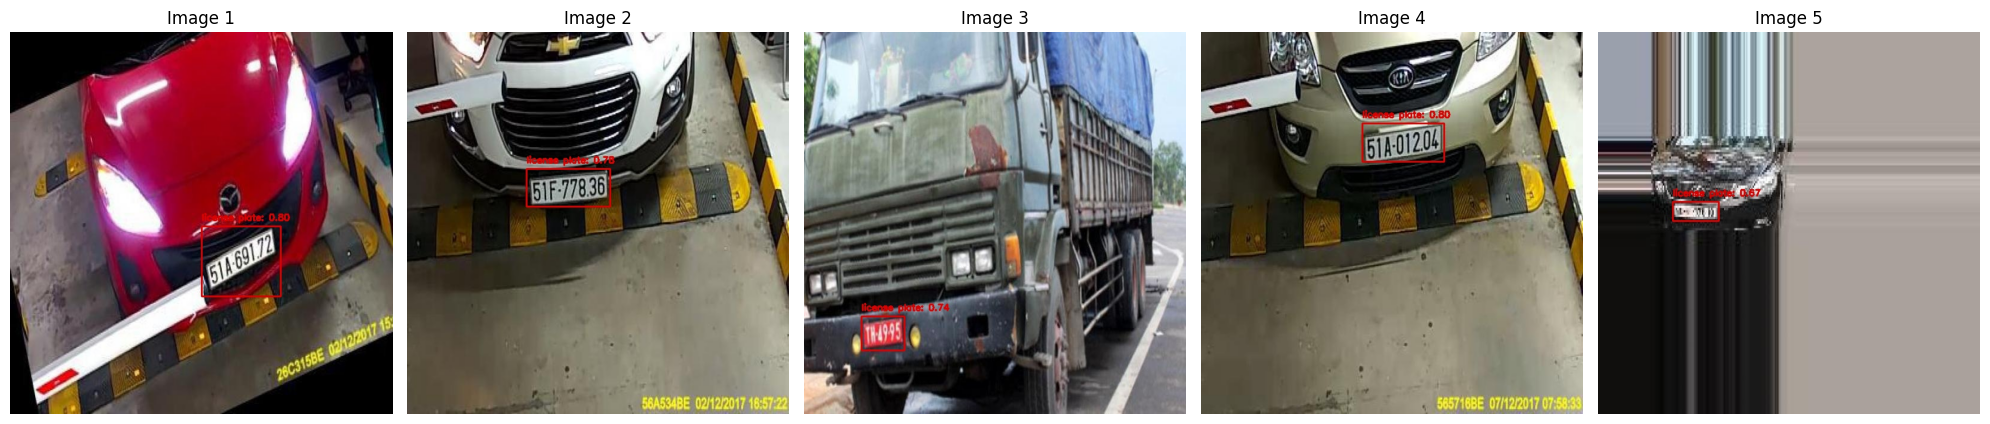

In [8]:
import matplotlib.pyplot as plt
import os
import random
from PIL import Image

def plot_random_images(directory, n=10):
    """
    Plots 'n' random images from the specified directory.
    
    Parameters:
    - directory: str, path to the directory containing images.
    - n: int, number of images to display, default is 10.
    """
    
    # Make sure the directory exists
    if not os.path.exists(directory):
        raise ValueError("The provided directory does not exist.")
    
    # Get all files in the directory
    files = os.listdir(directory)
    # Filter out non-image files
    images = [file for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
    
    # If there are not enough images, we'll just show all we have
    if len(images) < n:
        print(f"Only found {len(images)} images in directory. Showing all available images.")
        n = len(images)
    
    # Randomly select 'n' images
    selected_images = random.sample(images, n)
    
    # Plot the images
    plt.figure(figsize=(20, 10))
    for i, img_name in enumerate(selected_images):
        img_path = os.path.join(directory, img_name)
        img = Image.open(img_path)
        
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Image {i+1}')
    
    plt.tight_layout()
    plt.show()

plot_random_images('/kaggle/working/prediction', n = 5)
